In [2]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = sns.load_dataset("titanic")

# Display the first few rows of the dataset
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Descriptive Statistics

In [5]:
# 1. Passenger Count
passenger_count = len(titanic_df)

In [6]:
# 2. Passenger Age
mean_age = titanic_df['age'].mean()
median_age = titanic_df['age'].median()
std_age = titanic_df['age'].std()
age_range = (titanic_df['age'].min(), titanic_df['age'].max())
missing_age_percentage = titanic_df['age'].isnull().mean() * 100


# Display Descriptive Statistics
print("Passenger Count:", passenger_count)
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Standard Deviation of Age:", std_age)
print("Age Range:", age_range)
print("Percentage of Missing Age Values:", missing_age_percentage)

Passenger Count: 891
Mean Age: 29.69911764705882
Median Age: 28.0
Standard Deviation of Age: 14.526497332334042
Age Range: (0.42, 80.0)
Percentage of Missing Age Values: 19.865319865319865


In [7]:
# 3. Passenger Fare
mean_fare = titanic_df['fare'].mean()
median_fare = titanic_df['fare'].median()
std_fare = titanic_df['fare'].std()
fare_range = (titanic_df['fare'].min(), titanic_df['fare'].max())
missing_fare_percentage = titanic_df['fare'].isnull().mean() * 100


print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Standard Deviation of Fare:", std_fare)
print("Fare Range:", fare_range)
print("Percentage of Missing Fare Values:", missing_fare_percentage)

Mean Fare: 32.204207968574636
Median Fare: 14.4542
Standard Deviation of Fare: 49.6934285971809
Fare Range: (0.0, 512.3292)
Percentage of Missing Fare Values: 0.0


In [8]:
# 4. Passenger Class
class_counts = titanic_df['class'].value_counts()
class_percentages = (class_counts / passenger_count) * 100

print("Passenger Class Counts:\n", class_counts)
print("Passenger Class Percentages:\n", class_percentages)

Passenger Class Counts:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64
Passenger Class Percentages:
 class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64


In [9]:
# 5. Survival Rate
survival_rate = titanic_df['survived'].mean() * 100
death_rate = 100 - survival_rate

print("Survival Rate:", survival_rate)
print("Death Rate:", death_rate)

Survival Rate: 38.38383838383838
Death Rate: 61.61616161616162


Visualises different aspects of the Titanic dataset, including the distribution of passenger ages, distribution of passenger fares, survival rate by passenger class, survival rate by gender, and survival rate by age.

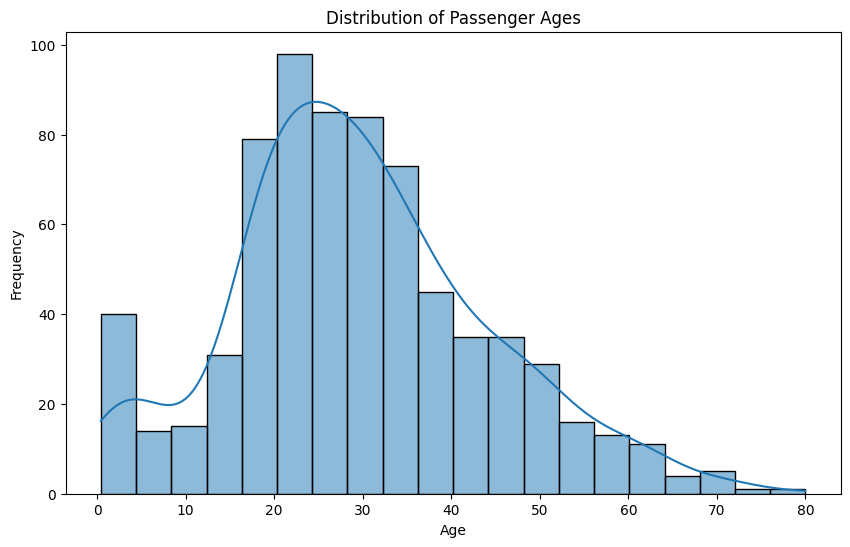

In [10]:
# Visualization

# 1. Distribution of Passenger Ages
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='age', bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

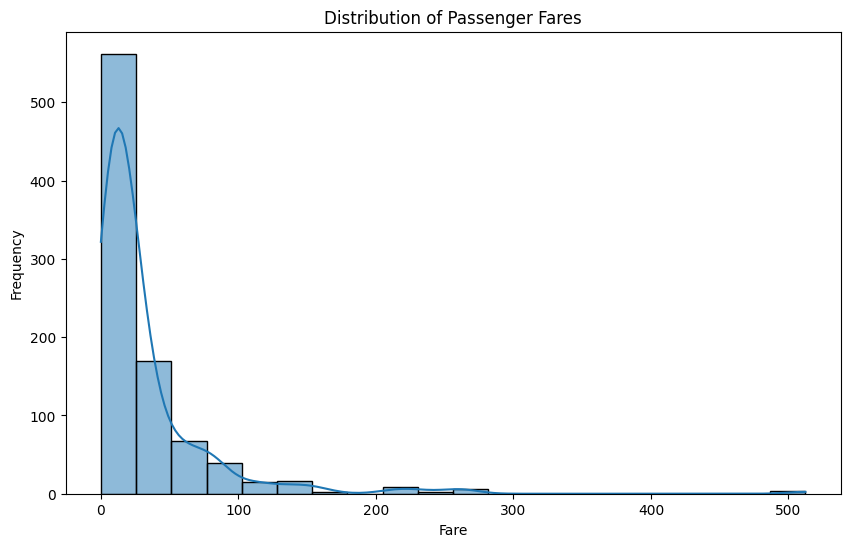

In [12]:
# 2. Distribution of Passenger Fares
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='fare', bins=20, kde=True)
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-d1c4fe2c3a4a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x='class', y='survived', ci=None)


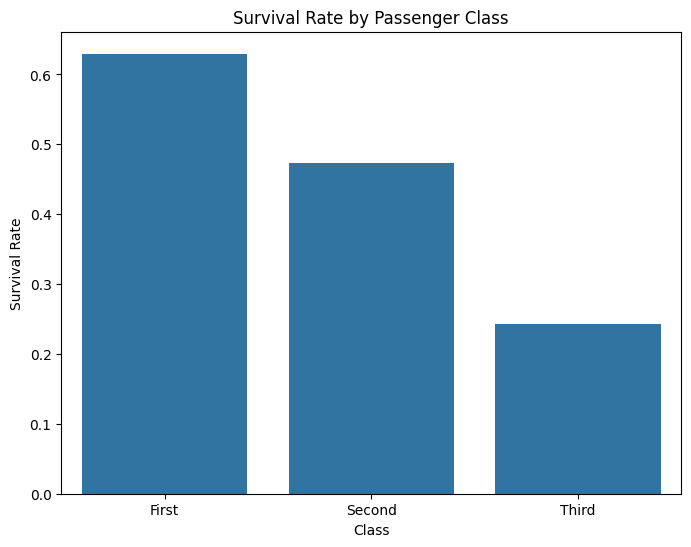

In [13]:
# 3. Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='class', y='survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-14-d76b6638ee3c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x='sex', y='survived', ci=None)


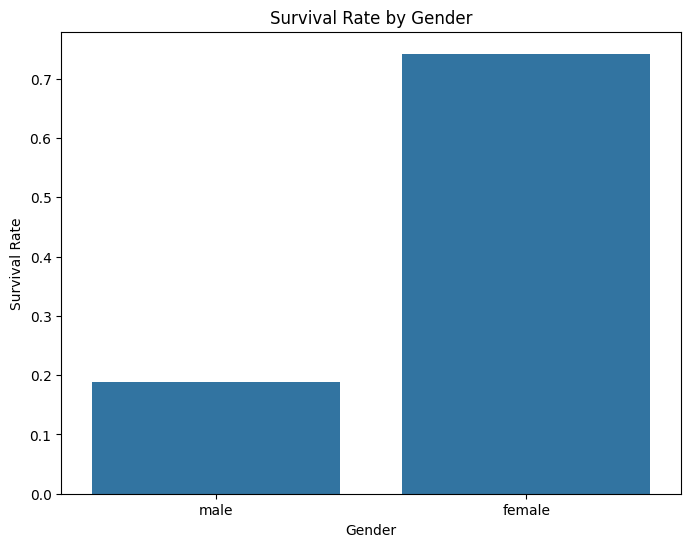

In [14]:
# 4. Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='sex', y='survived', ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

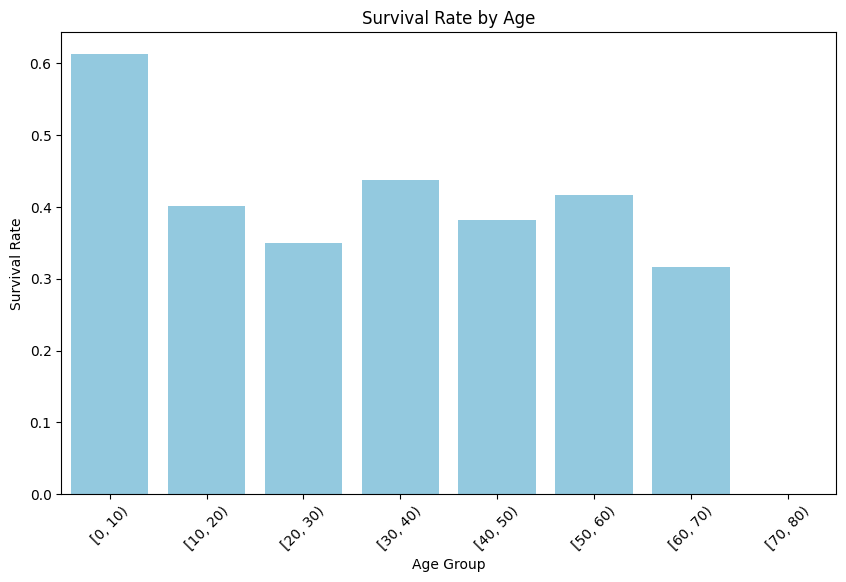

In [20]:
# Create age bins
age_bins = pd.cut(titanic_df['age'], bins=range(0, 90, 10), right=False)

# Calculate survival rate for each age bin
survival_by_age = titanic_df.groupby(age_bins)['survived'].mean().reset_index()

# Visualization: Survival Rate by Age (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_by_age, x='age', y='survived', color='skyblue')
plt.title('Survival Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


#Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values . you could find a confidence interval for the population proportion.


To analyze the variables in the Titanic dataset and gain insights into possible population values, let's focus on the variable 'sex', which represents the gender of the passengers. We'll calculate the confidence interval for the population proportion of females among all passengers.

In [21]:
# Import necessary libraries
from statsmodels.stats.proportion import proportion_confint

In [26]:
# Calculate the number of female passengers
female_passengers = titanic_df[titanic_df['sex'] == 'female'].shape[0]
print("Number of Female Passengers:", female_passengers)

Number of Female Passengers: 314


In [27]:
# Calculate the total number of passengers
total_passengers = titanic_df.shape[0]
print("Total Number of Passengers:", total_passengers)


Total Number of Passengers: 891


In [28]:
# Calculate the proportion of female passengers
proportion_female = female_passengers / total_passengers
print("Proportion of Female Passengers:", proportion_female)


Proportion of Female Passengers: 0.35241301907968575


In [29]:
# Calculate the confidence interval for the population proportion of females
ci_female = proportion_confint(female_passengers, total_passengers, alpha=0.05, method='normal')
print("95% Confidence Interval for the Population Proportion of Females:", ci_female)

95% Confidence Interval for the Population Proportion of Females: (0.3210452042496816, 0.3837808339096899)


**Interpretation:**

- Lower Bound: 0.321
- Upper Bound: 0.384

This confidence interval suggests that we can be 95% confident that the true proportion of females among all passengers on the Titanic falls within the range of approximately 32.1% to 38.4%. In other words:

There is a 95% chance that the true proportion of female passengers on the Titanic is between 32.1% and 38.4%.

We are fairly confident that the population proportion of females is not below 32.1% or above 38.4%.

This information provides insights into the likely range of the proportion of female passengers on the Titanic, helping us better understand the gender distribution among passengers with a certain level of confidence.

#  Apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests.

In [30]:
# Import necessary libraries
import scipy.stats as stats

# Comparison 1: Survival Rates by Gender

## Hypothesis:
- Null Hypothesis (H0): There is no difference in the survival rates between male and female passengers.
- Alternative Hypothesis (H1): There is a difference in the survival rates between male and female passengers.

## Test Used:
- Parametric Test: Independent t-test
- Non-parametric Test: Mann-Whitney U test

## Explanation:
- The t-test assumes that the survival rates of male and female passengers are normally distributed, whereas the Mann-Whitney U test does not make this assumption and is suitable for non-normally distributed data or ordinal data.


In [31]:
# Extract survival data for male and female passengers
male_survived = titanic_df[titanic_df['sex'] == 'male']['survived']
female_survived = titanic_df[titanic_df['sex'] == 'female']['survived']

In [32]:
# Perform parametric test: Independent t-test
t_stat_gender, p_val_gender_t = stats.ttest_ind(male_survived, female_survived)


In [33]:
# Perform non-parametric test: Mann-Whitney U test
u_stat_gender, p_val_gender_u = stats.mannwhitneyu(male_survived, female_survived)


In [34]:
# Print results
print("1. Comparison of Survival Rates by Gender:")
print("Parametric t-test p-value:", p_val_gender_t)
print("Non-parametric Mann-Whitney U test p-value:", p_val_gender_u)

1. Comparison of Survival Rates by Gender:
Parametric t-test p-value: 1.4060661308802594e-69
Non-parametric Mann-Whitney U test p-value: 4.315906231881016e-59


In [35]:
# Interpretation
if p_val_gender_t < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in survival rates between male and female passengers.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in survival rates between male and female passengers.")

if p_val_gender_u < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in survival rates between male and female passengers.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in survival rates between male and female passengers.")

Parametric t-test: Reject null hypothesis. There is a significant difference in survival rates between male and female passengers.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in survival rates between male and female passengers.


#Comparison 2: Comparison of Survival Rates by Passenger Class
## Hypothesis:

- Null Hypothesis (H0): There is no difference in survival rates among different passenger classes.
- Alternative Hypothesis (H1): There is a difference in survival rates among different passenger classes.

##Tests Used:

- Parametric Test: One-way ANOVA
- Non-parametric Test: Kruskal-Wallis H test

## Explanation:

- ANOVA is used to compare means across multiple groups.
- Kruskal-Wallis H test is a non-parametric alternative to ANOVA when the assumption of normality is violated or the data is ordinal.

In [36]:
# Extract survival data for each passenger class
class_1_survived = titanic_df[titanic_df['class'] == 'First']['survived']
class_2_survived = titanic_df[titanic_df['class'] == 'Second']['survived']
class_3_survived = titanic_df[titanic_df['class'] == 'Third']['survived']

In [37]:
# Perform parametric test: One-way ANOVA
f_stat_class, p_val_class_f = stats.f_oneway(class_1_survived, class_2_survived, class_3_survived)


In [38]:
# Perform non-parametric test: Kruskal-Wallis H test
h_stat_class, p_val_class_h = stats.kruskal(class_1_survived, class_2_survived, class_3_survived)

In [39]:
# Interpretation of Comparison 2: Survival Rates by Passenger Class
print("2. Comparison of Survival Rates by Passenger Class:")
print("Parametric ANOVA p-value:", p_val_class_f)
print("Non-parametric Kruskal-Wallis H test p-value:", p_val_class_h)

if p_val_class_f < 0.05:
    print("Parametric ANOVA: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.")
else:
    print("Parametric ANOVA: Fail to reject null hypothesis. There is no significant difference in survival rates among passenger classes.")

if p_val_class_h < 0.05:
    print("Non-parametric Kruskal-Wallis H test: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.")
else:
    print("Non-parametric Kruskal-Wallis H test: Fail to reject null hypothesis. There is no significant difference in survival rates among passenger classes.")
print()

2. Comparison of Survival Rates by Passenger Class:
Parametric ANOVA p-value: 2.1832474151179777e-24
Non-parametric Kruskal-Wallis H test p-value: 4.819647000539969e-23
Parametric ANOVA: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.
Non-parametric Kruskal-Wallis H test: Reject null hypothesis. There is a significant difference in survival rates among passenger classes.



# Comparison 3: Comparison of Survival Rates by Embarked Port

## Hypothesis:

- Null Hypothesis (H0): There is no association between the port of embarkation and survival rates.
- Alternative Hypothesis (H1): There is an association between the port of embarkation and survival rates.

##Tests Used:

- Parametric Test: Chi-squared test for independence
- Non-parametric Test: Not applicable

##Explanation:

- Chi-squared test for independence is used to determine if there is a significant association between two categorical variables.

- The Mann-Whitney U test is not suitable for this scenario. It is typically used to compare two independent groups when the outcome variable is continuous or ordinal, not categorical.

In [40]:
# Create a contingency table for survival by embarked port
embarked_survived = pd.crosstab(titanic_df['embarked'], titanic_df['survived'])

# Perform parametric test: Chi-squared test for independence
chi2_stat_embarked, p_val_embarked_chi2, _, _ = stats.chi2_contingency(embarked_survived)

# Perform non-parametric test: Chi-squared test for independence
chi2_stat_embarked_u, p_val_embarked_chi2_u = stats.mannwhitneyu(embarked_survived.iloc[0], embarked_survived.iloc[1])


In [42]:
# Interpretation of Comparison 3: Survival Rates by Embarked Port
print("3. Comparison of Survival Rates by Embarked Port:")
print("Parametric Chi-squared test p-value:", p_val_embarked_chi2)


if p_val_embarked_chi2 < 0.05:
    print("Parametric Chi-squared test: Reject null hypothesis. There is a significant association between the port of embarkation and survival rates.")
else:
    print("Parametric Chi-squared test: Fail to reject null hypothesis. There is no significant association between the port of embarkation and survival rates.")



3. Comparison of Survival Rates by Embarked Port:
Parametric Chi-squared test p-value: 1.769922284120912e-06
Parametric Chi-squared test: Reject null hypothesis. There is a significant association between the port of embarkation and survival rates.


# Comparison 4: Comparison of Fare by Passenger Class

##Hypothesis:

- Null Hypothesis (H0): There is no difference in fare prices among different passenger classes.
- Alternative Hypothesis (H1): There is a difference in fare prices among different passenger classes.

##Tests Used:

- Parametric Test: Independent t-test
- Non-parametric Test: Mann-Whitney U test

## Explanation:

- Independent t-test is used to compare means between two independent groups.
- Mann-Whitney U test is a non-parametric alternative to the independent t-test when the assumptions are not met.

In [43]:
# Extract fare data for each passenger class
class_1_fare = titanic_df[titanic_df['class'] == 'First']['fare']
class_2_fare = titanic_df[titanic_df['class'] == 'Second']['fare']
class_3_fare = titanic_df[titanic_df['class'] == 'Third']['fare']

# Perform parametric test: Independent t-test
t_stat_fare, p_val_fare_t = stats.ttest_ind(class_1_fare, class_2_fare)

# Perform non-parametric test: Mann-Whitney U test
u_stat_fare, p_val_fare_u = stats.mannwhitneyu(class_1_fare, class_2_fare)


In [44]:
# Interpretation of Comparison 4: Comparison of Fare by Passenger Class
print("4. Comparison of Fare by Passenger Class:")
print("Parametric t-test p-value:", p_val_fare_t)
print("Non-parametric Mann-Whitney U test p-value:", p_val_fare_u)

if p_val_fare_t < 0.05:
    print("Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Parametric t-test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

if p_val_fare_u < 0.05:
    print("Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.")
else:
    print("Non-parametric Mann-Whitney U test: Fail to reject null hypothesis. There is no significant difference in fare prices among passenger classes.")

4. Comparison of Fare by Passenger Class:
Parametric t-test p-value: 3.303644173119574e-24
Non-parametric Mann-Whitney U test p-value: 4.760107632647433e-47
Parametric t-test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.
Non-parametric Mann-Whitney U test: Reject null hypothesis. There is a significant difference in fare prices among passenger classes.


#When to choose the hypothesis test

## Independent t-test:
- Use: Comparing means of two independent groups.
- When to Choose: When comparing means of continuous variables between two independent groups, and the data meet the assumptions of normality and homogeneity of variance.

## Mann-Whitney U test:
- Use: Non-parametric alternative to the independent t-test.
- When to Choose: When comparing distributions of continuous or ordinal variables between two independent groups, and the data do not meet the assumptions of normality and homogeneity of variance.

## One-way ANOVA:
- Use: Comparing means of three or more independent groups.
- When to Choose: When comparing means of continuous variables among multiple independent groups (more than two), and the data meet the assumptions of normality and homogeneity of variance.

##Kruskal-Wallis H test:
- Use: Non-parametric alternative to one-way ANOVA.
- When to Choose: When comparing distributions of continuous or ordinal variables among multiple independent groups (more than two), and the data do not meet the assumptions of normality and homogeneity of variance.

##Chi-squared test for independence:
- Use: Assessing the association between two categorical variables.
- When to Choose: When analyzing the association between two categorical variables, and the data consist of counts or frequencies.

#Task Description:

Your task is to explore and analyze the Wine dataset using descriptive statistics and hypothesis testing techniques.
You are required to perform the following tasks:


##Step-by-Step Task Description:

- Dataset Selection: Choose the Wine dataset from scikit-learn (sklearn.datasets.load_wine).
- Data Exploration: Explore the dataset to understand its structure, summary statistics, and variable distributions.
- Descriptive Statistics and Visualization: Compute descriptive statistics and create visualizations (e.g., histograms, box plots) for key variables.
- Hypothesis Formulation: Formulate hypotheses to compare variables across different wine cultivars.
- Hypothesis Testing: Select appropriate statistical tests (e.g., ANOVA, t-tests) and conduct hypothesis tests.